## Loading Library

In [29]:
!pip install mlxtend==0.23.1

In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings(
    "ignore",
    category=DeprecationWarning,
    module="jupyter_client.session"
)



# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/bread%20basket%20(1).csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [31]:
#1
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/bread%20basket%20(1).csv")
df.head()


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [32]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [33]:
#3 check missing values
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

4. The overview reveals a clean dataset consist of 20507 rows, 5 columns with no null values . (fill that blank on the section below)

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

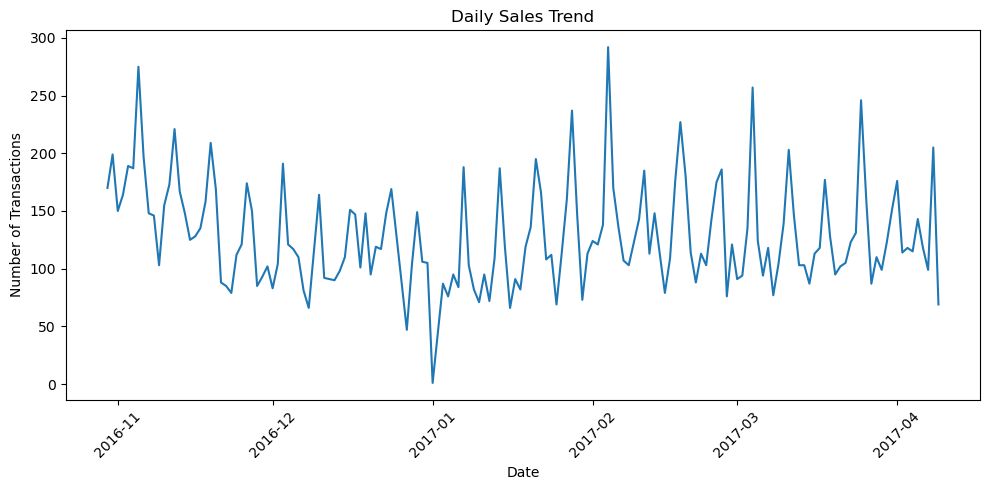

In [34]:
# 5
# Convert date_time to datetime (your format: dd-mm-yyyy HH:MM)
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')
df['date'] = df['date_time'].dt.date
daily_sales = df.groupby('date').size().reset_index(name='transaction_count')

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(daily_sales['date'], daily_sales['transaction_count'])
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [35]:
# 6
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['time'] = df['date_time'].dt.time
df['hour'] = df['date_time'].dt.hour
df['day_name'] = df['date_time'].dt.day_name()

df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,date,day,month,year,time,hour,day_name
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,30,10,2016,09:58:00,9,Sunday
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,30,10,2016,10:05:00,10,Sunday
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,30,10,2016,10:05:00,10,Sunday
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,30,10,2016,10:07:00,10,Sunday
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,30,10,2016,10:07:00,10,Sunday



Alright, now I can easily create a visualization of monthly sales.

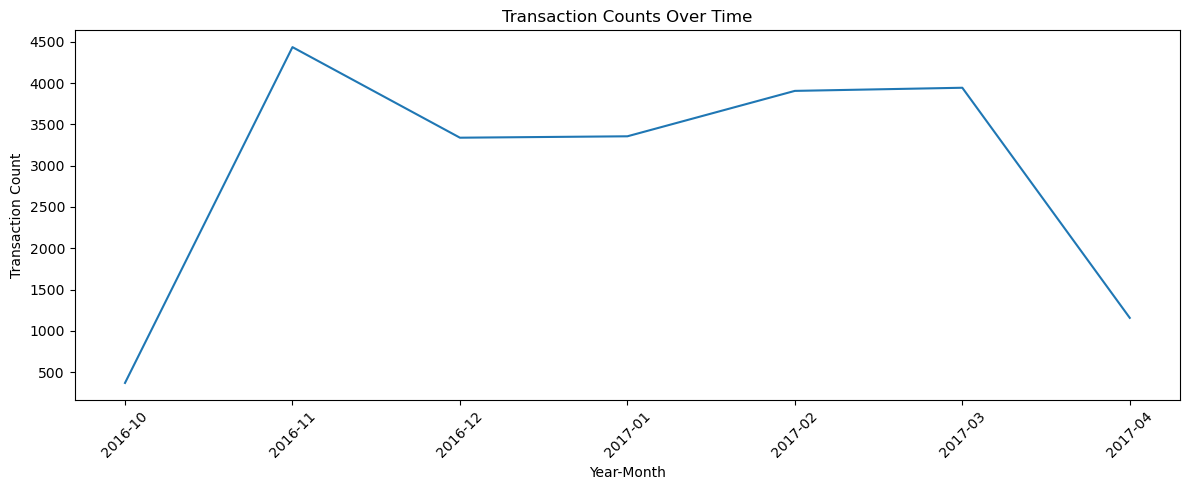

In [36]:
# 7
df['year_month'] = df['date_time'].dt.to_period('M').astype(str)
monthly_trend = df.groupby('year_month').size().reset_index(name='transaction_count')

plt.figure(figsize=(12, 5))
plt.plot(monthly_trend['year_month'], monthly_trend['transaction_count'])
plt.title("Transaction Counts Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


8. Now, the visualization above provides better insights: 
- November 2016 has the highest transaction count, almost 4500 but starts to goes down reaching only 3500 transactions every month till March 2017 then drops low to only 1000 on April 2017. (fill that blank on the section below)

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [37]:
#9
weekday = df[df['weekday_weekend'] == 'weekday']['day_name'].unique()
weekend = df[df['weekday_weekend'] == 'weekend']['day_name'].unique()

print('Unique weekday names:', weekday)
print('Unique weekend names:', weekend)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [50]:
#10
weekday_month = df.groupby(['month', 'day_name']).size().reset_index(name='count')

weekday_table = weekday_month.pivot(
    index='month',
    columns='day_name',
    values='count'
).fillna(0)

# convert to int
weekday_table = weekday_table.astype(int)

# reorder columns (optional)
weekday_table = weekday_table[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

weekday_table


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is 
- On October, there were NO transactions that occured except on Mondays
- On Saturday, almost all months (except for April) has the highest total transaction, reaching up to 883 (March).
- Most transaction counts, ranges from 300-500 daily


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

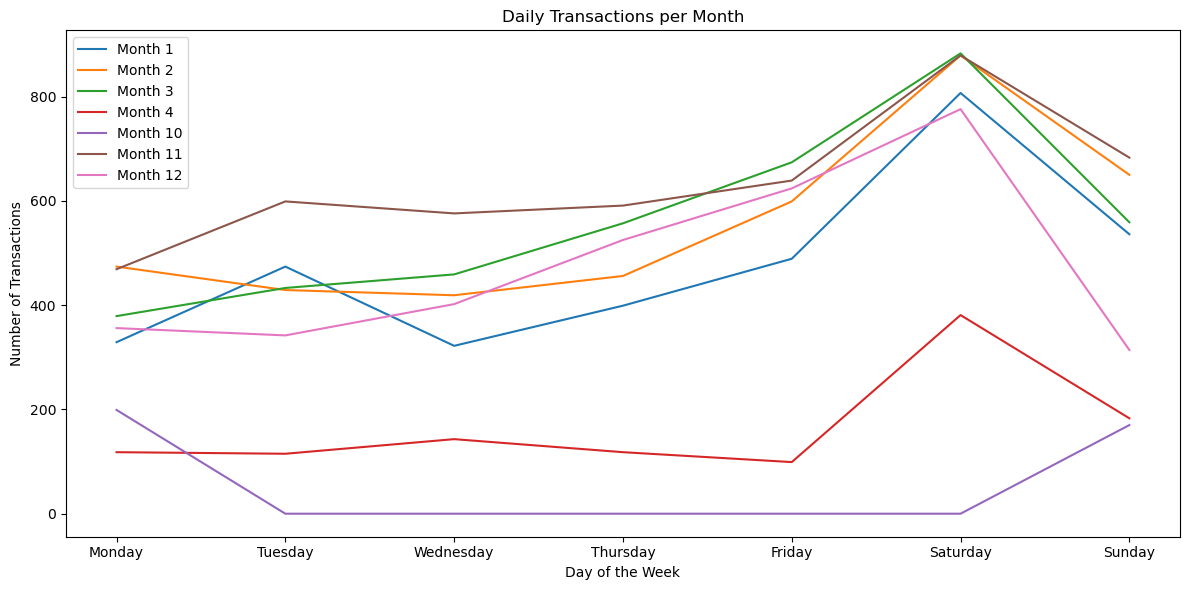

In [55]:
# 12
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(12,6))

for month in weekday_table.index:
    plt.plot(
        days,
        weekday_table.loc[month, days],
        label=f'Month {month}'
    )

plt.title("Daily Transactions per Month")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")
plt.legend()
plt.tight_layout()
plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that:
- The number of transaction reaches its highest point on Saturday
- Starting Wednesday to Saturday, the total of transaction rises up too 600 but drops back on Sunday
- The highest total transaction occured daily is during November and the lowest total transaction is during October.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [60]:
# 14
day = df['period_day'].unique()
day

array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [62]:
# 15
morning = df[df['period_day'] == 'morning']['hour'].unique()
afternoon = df[df['period_day'] == 'afternoon']['hour'].unique()
evening = df[df['period_day'] == 'evening']['hour'].unique()
night = df[df['period_day'] == 'night']['hour'].unique()

print ("Unique morning_hour:", morning)
print ("Unique afternoon_hour:", afternoon)
print ("Unique evening_hour:", evening)
print ("Unique night_hour:", night)


Unique morning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

Yeah morning hour is 1, this happens because your original dataset contains timestamps (2017-xx-xx 01:xx:00). There shouldnt be morning hour 1


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

In [63]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,date,day,month,year,time,hour,day_name,year_month,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,30,10,2016,09:58:00,9,Sunday,2016-10,199,0,0,0,0,0,170
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,30,10,2016,10:05:00,10,Sunday,2016-10,199,0,0,0,0,0,170
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,30,10,2016,10:05:00,10,Sunday,2016-10,199,0,0,0,0,0,170
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,30,10,2016,10:07:00,10,Sunday,2016-10,199,0,0,0,0,0,170
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,30,10,2016,10:07:00,10,Sunday,2016-10,199,0,0,0,0,0,170


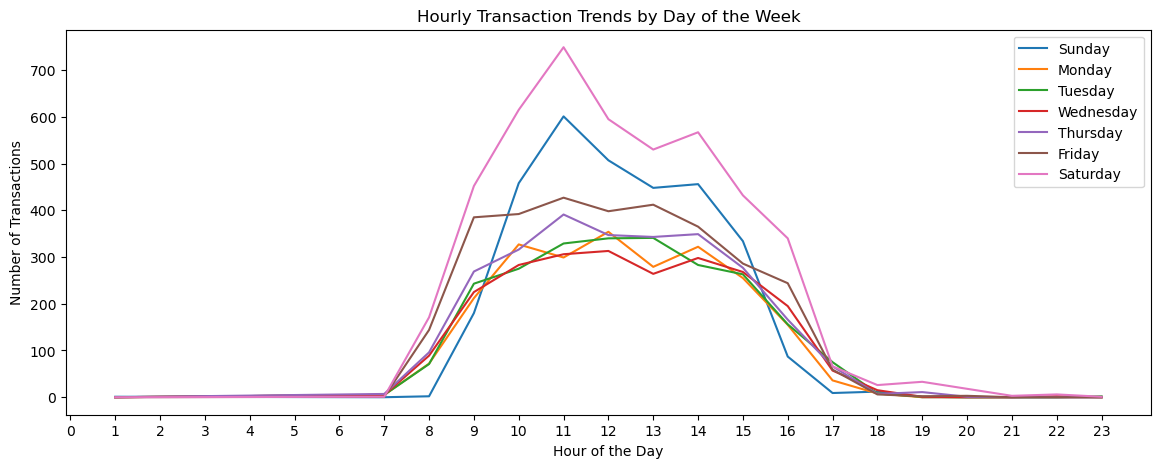

In [68]:
# 17
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df['day_name'] = df['date_time'].dt.day_name()

agg = df.groupby(['day_name', 'hour']).size().reset_index(name='count')

pivot = agg.pivot(index='hour', columns='day_name', values='count').fillna(0)

order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
pivot = pivot[ [d for d in order if d in pivot.columns] ]

plt.figure(figsize=(14,5))
for day in pivot.columns:
    plt.plot(pivot.index, pivot[day], label=day)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Hourly Transaction Trends by Day of the Week')
plt.legend()
plt.xticks(range(24))
plt.show()

18. The daily sales trend plot reveals that ___________

- Number of transactions start to rise startinig from hour 7 (morning)
- Highest number of transaction occured during hour 10-11 but starts to drop after that
- Rises again on hour 14 then starts to drop till hour 17
- Highest transaction is on Saturday, lowest transaction is on Wednesday and Monday

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

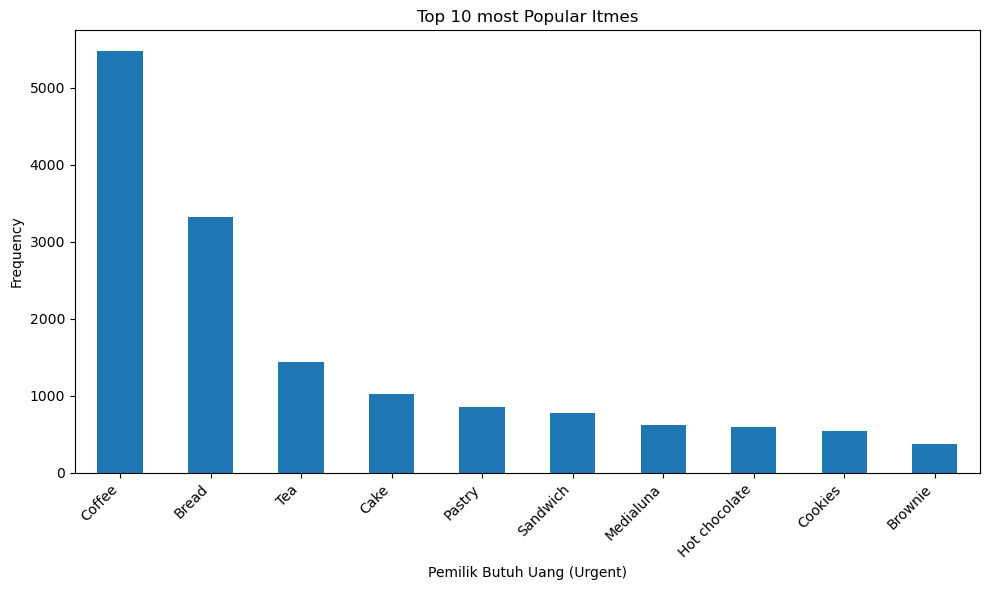

In [73]:
# 19
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
df['Item'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 most Popular Itmes')
plt.xlabel('Pemilik Butuh Uang (Urgent)')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

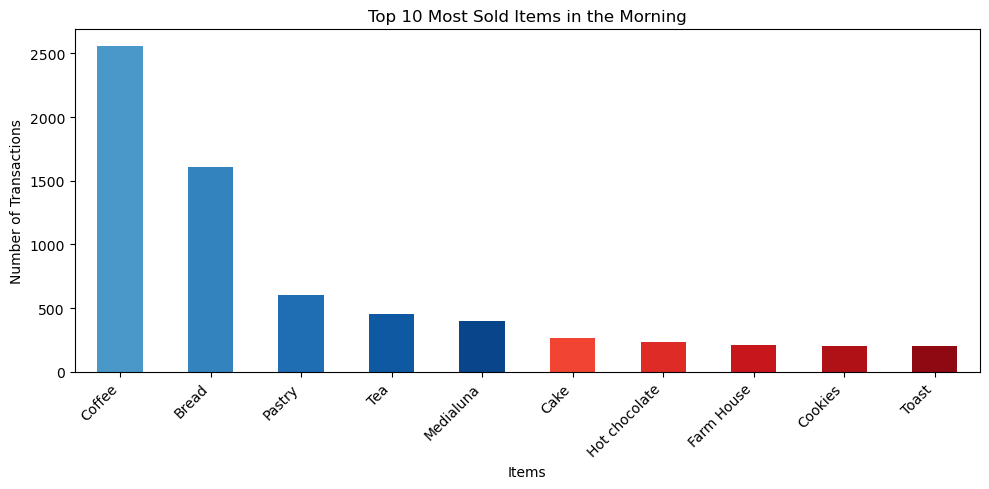

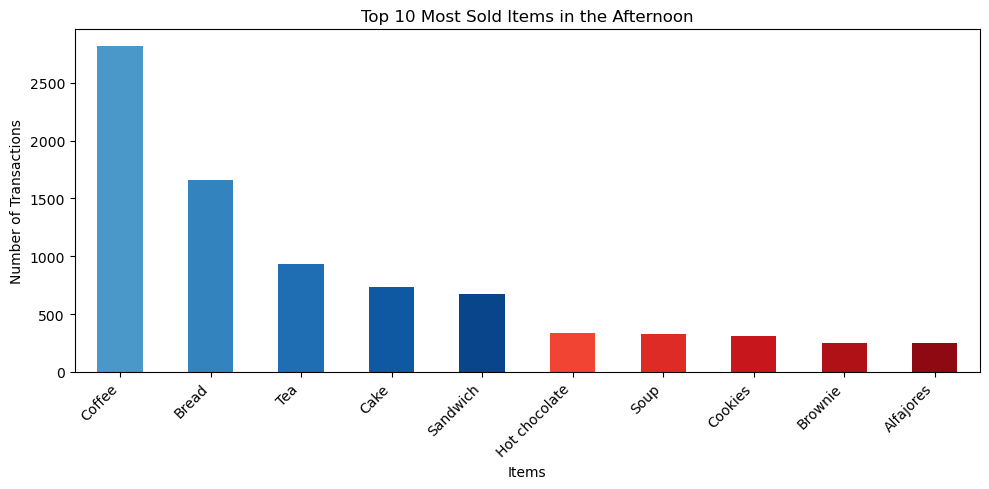

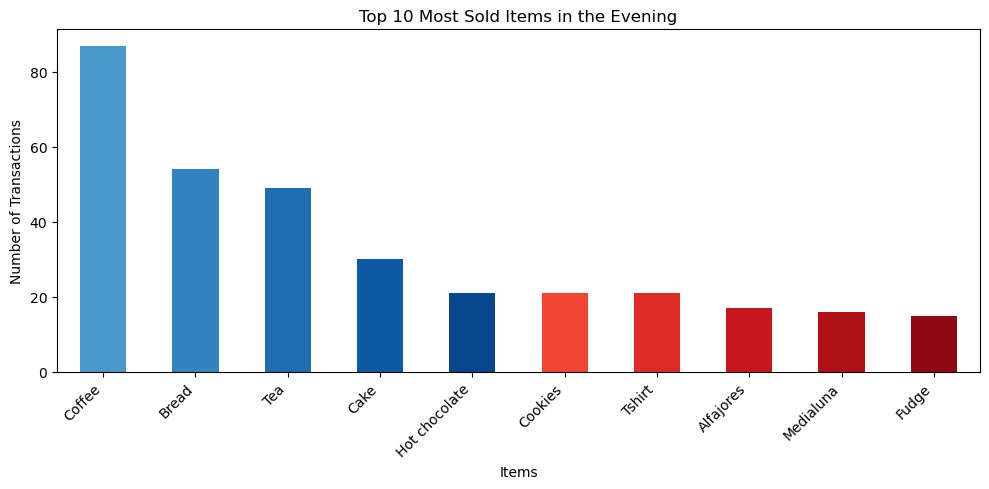

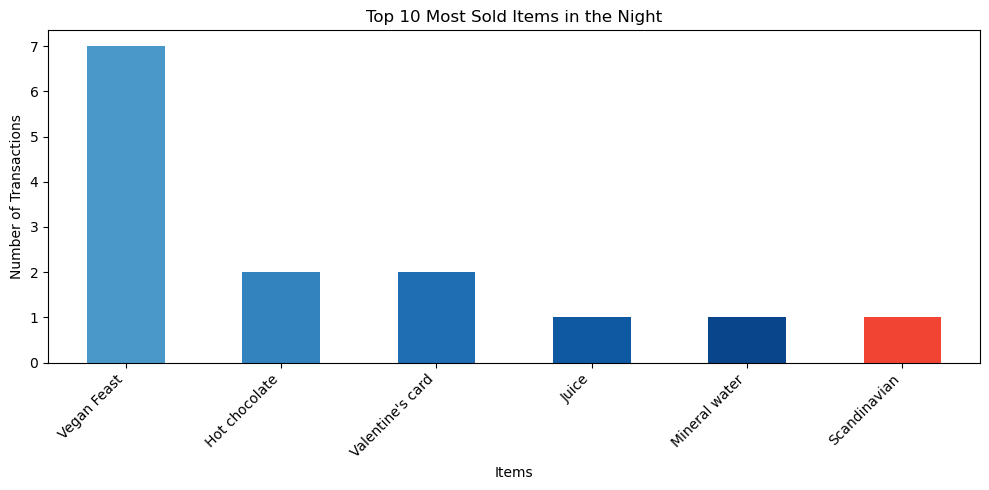

In [79]:
# 20
def plot_top10(df, period):
    plt.figure(figsize=(10, 5))
    top10 = (
        df[df['period_day'] == period]['Item']
        .value_counts()
        .head(10)
    )
    colors = []
    for i in range(10):
        if i < 5:
            # Top 5 → blues
            colors.append(plt.cm.Blues(0.6 + 0.08 * i))
        else:
            # Bottom 5 → reds
            colors.append(plt.cm.Reds(0.6 + 0.08 * (i - 5)))

    top10.plot(kind='bar', color=colors)
    plt.title(f"Top 10 Most Sold Items in the {period.capitalize()}")
    plt.xlabel("Items")
    plt.ylabel("Number of Transactions")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_top10(df, 'morning')
plot_top10(df, 'afternoon')
plot_top10(df, 'evening')
plot_top10(df, 'night')


21. It turns out that there is something different in the plot above, the insight is 
- there are variation of top item sold in different period of days
- in the morning, afternoon and evening , coffee and bread is the most sold item but at night, vegann feast and hot chocolate is the most sold item


I found a valentine card, I was curious about when people bought it so I made a visualization of it

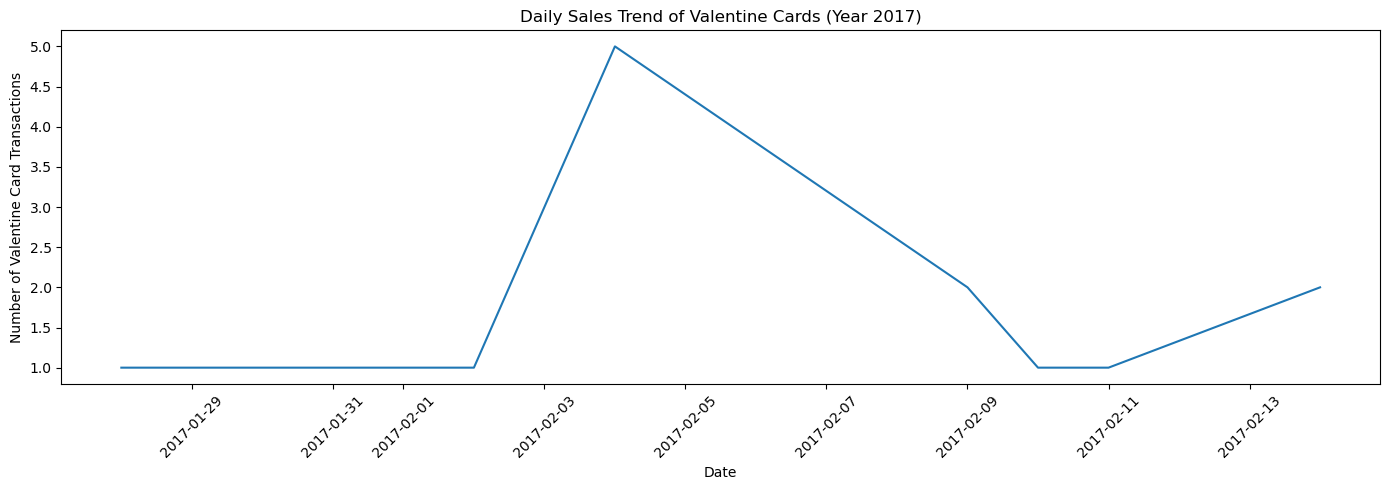

In [83]:
# Filter only Valentine card sales
valentine_df = df[df['Item'] == "Valentine's card"].copy()
valentine_df['date'] = valentine_df['date_time'].dt.date
valentine_2017 = valentine_df[
    valentine_df['date_time'].dt.year == 2017
]

daily_trend = (
    valentine_2017.groupby('date')
    .size()
    .reset_index(name='transaction_count')
)

# Plot
plt.figure(figsize=(14, 5))
plt.plot(daily_trend['date'], daily_trend['transaction_count'])

plt.title("Daily Sales Trend of Valentine Cards (Year 2017)")
plt.xlabel("Date")
plt.ylabel("Number of Valentine Card Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


23. I found the insight from the sale of the Valentine's cards above is ____


- Starting February 2nd, sales for valentines card starts to rise, and highest reach up to 5 transaction on February 4, but starts to drop till February 10 then rises again till February 14.

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [107]:
# 24
itemset = set(np.ravel(df["Item"]))

# encoding the feature
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row)
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]

{'Polenta': 0,
 'Bread Pudding': 0,
 'Siblings': 0,
 'Christmas common': 0,
 'Adjustment': 0,
 'Nomad bag': 0,
 'Truffles': 0,
 'Jam': 0,
 'Pastry': 0,
 'Chicken sand': 0,
 'Vegan Feast': 0,
 'Chocolates': 0,
 'Tartine': 0,
 'Argentina Night': 0,
 'Half slice Monster ': 0,
 'Muffin': 0,
 'Bakewell': 0,
 'Crisps': 0,
 'Granola': 0,
 'Brownie': 0,
 'Bowl Nic Pitt': 0,
 'Cake': 0,
 'Gingerbread syrup': 0,
 'Crepes': 0,
 'Soup': 0,
 'Cookies': 0,
 'Mineral water': 0,
 'Hack the stack': 0,
 'Chimichurri Oil': 0,
 'Duck egg': 0,
 'Tacos/Fajita': 0,
 'Caramel bites': 0,
 'Fudge': 0,
 'Tiffin': 0,
 'Panatone': 0,
 'The BART': 0,
 "Ella's Kitchen Pouches": 0,
 'Art Tray': 0,
 'Dulce de Leche': 0,
 'My-5 Fruit Shoot': 0,
 'Drinking chocolate spoons ': 0,
 'Raspberry shortbread sandwich': 0,
 'Fairy Doors': 0,
 'The Nomad': 0,
 'Frittata': 0,
 'Salad': 0,
 'Baguette': 0,
 'Focaccia': 0,
 'Kids biscuit': 0,
 "Valentine's card": 0,
 'Coffee granules ': 0,
 'Bacon': 0,
 'Extra Salami or Feta': 0,
 '

In [108]:
df2 = pd.DataFrame(encoded_vals)
df2 = df2[sorted(df2.columns)]
df2.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
#25

# Convert quantities to 1 and 0
df2 = pd.DataFrame(encoded_vals)
df2 = df2[sorted(df2.columns)]
df2.head()


,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. Apriori: (min_support=0.02), Association Rules: (metric="lift", min_threshold=1)

In [110]:
# 26
from mlxtend.frequent_patterns import apriori, association_rules
df_apriori = apriori(df2, min_support = 0.02, use_colnames = True)
df_apriori

c:\Users\celin\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.162140,(Bread)
1,0.049983,(Cake)
2,0.266787,(Coffee)
3,0.026332,(Cookies)
4,0.028771,(Hot chocolate)
5,0.030039,(Medialuna)
6,0.041742,(Pastry)
7,0.037597,(Sandwich)
8,0.069976,(Tea)


In [105]:
# 27
df_ar = association_rules(df_apriori, metric = "lift", min_threshold = 1)
df_ar


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:

